In [1]:
pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/40wj0jrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/a7mx16f8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80507', 'data', 'file=/tmp/tmp1tnpgqtf/40wj0jrn.json', 'init=/tmp/tmp1tnpgqtf/a7mx16f8.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelkfrqojxx/prophet_model-20241030065727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


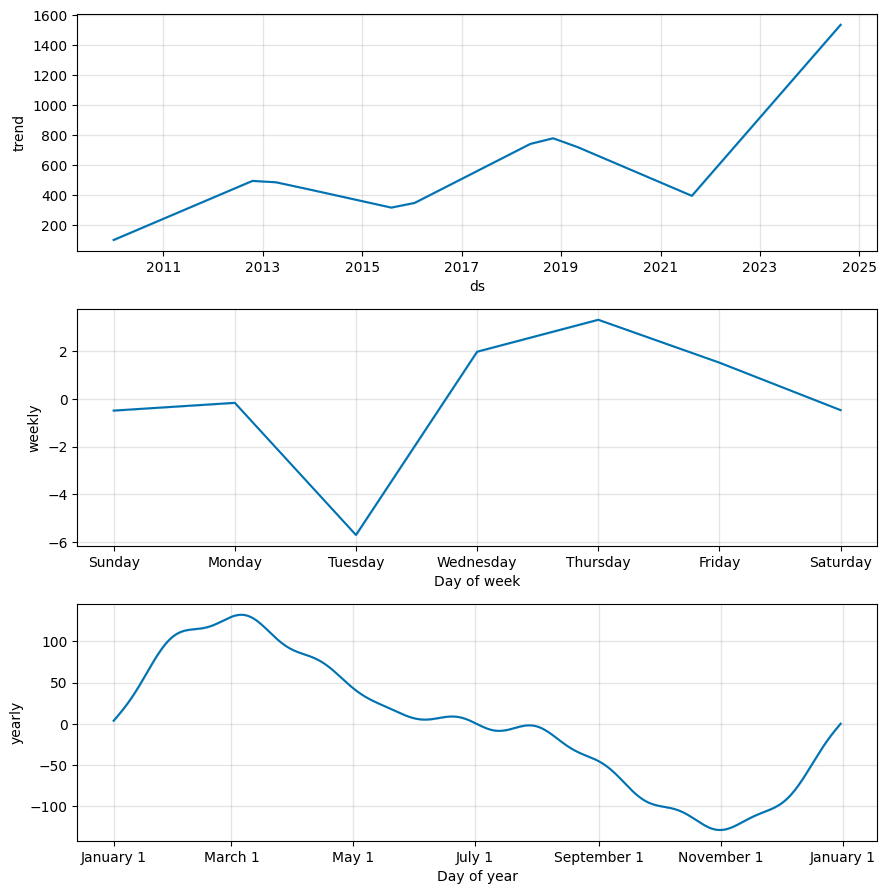

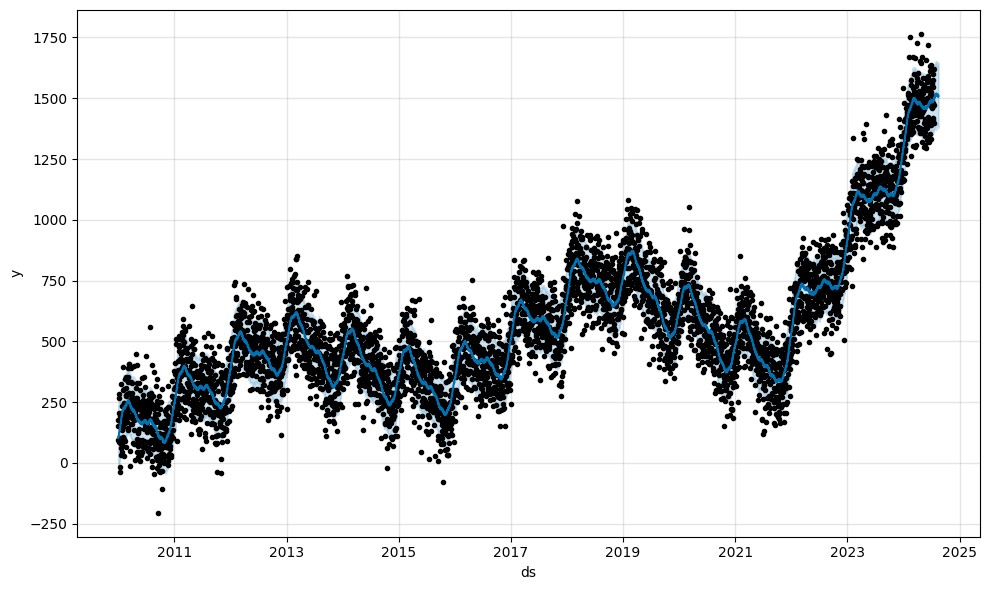

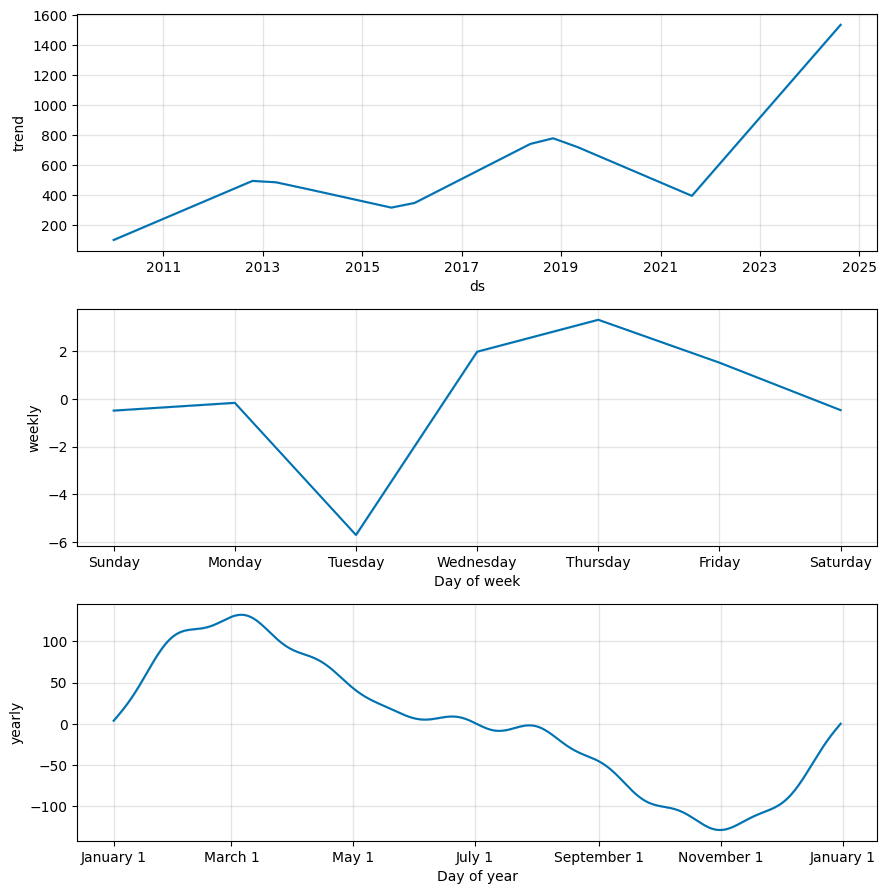

In [3]:
# Install required packages
!pip install prophet
!pip install openpyxl

# Import libraries
import pandas as pd
from prophet import Prophet

# Load the data
data = pd.read_excel("/content/Forecast Data.xlsx")

# Prepare data for Prophet
df = data[['Date', 'Revenue']].rename(columns={'Date': 'ds', 'Revenue': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit Prophet model
model = Prophet()
model.fit(df)

# Create a future dataframe for 30 days and predict
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast results and components
model.plot(forecast)
model.plot_components(forecast)


In [4]:
from prophet import Prophet

# Initialize and add custom quarterly seasonality
model = Prophet()
model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)  # Adjust 'fourier_order' as needed
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/a4kxahru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/la_lnwlc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17458', 'data', 'file=/tmp/tmp1tnpgqtf/a4kxahru.json', 'init=/tmp/tmp1tnpgqtf/la_lnwlc.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelih9a_m6z/prophet_model-20241030065842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:58:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
model = Prophet()
model.add_country_holidays(country_name='US')  # Automatically adds US holidays
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/h6yy0ewq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/udl2sxay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19674', 'data', 'file=/tmp/tmp1tnpgqtf/h6yy0ewq.json', 'init=/tmp/tmp1tnpgqtf/udl2sxay.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelrh2yl1o1/prophet_model-20241030065909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
import pandas as pd

# Define custom holiday events
holidays = pd.DataFrame({
    'holiday': 'fiscal_year_end',
    'ds': pd.to_datetime(['2024-12-31', '2025-12-31']),  # Key dates impacting business
    'lower_window': -1,  # Days before the event
    'upper_window': 1    # Days after the event
})

# Add to model
model = Prophet(holidays=holidays)
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/bko9ueh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/b494cenj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55914', 'data', 'file=/tmp/tmp1tnpgqtf/bko9ueh8.json', 'init=/tmp/tmp1tnpgqtf/b494cenj.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelwkl9m06m/prophet_model-20241030065926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
model = Prophet(changepoint_prior_scale=0.05)  # Lowering prior scale to make the model less sensitive to change points
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/z3248s2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/m90qszp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82497', 'data', 'file=/tmp/tmp1tnpgqtf/z3248s2l.json', 'init=/tmp/tmp1tnpgqtf/m90qszp1.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_model08qf2p8g/prophet_model-20241030070209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


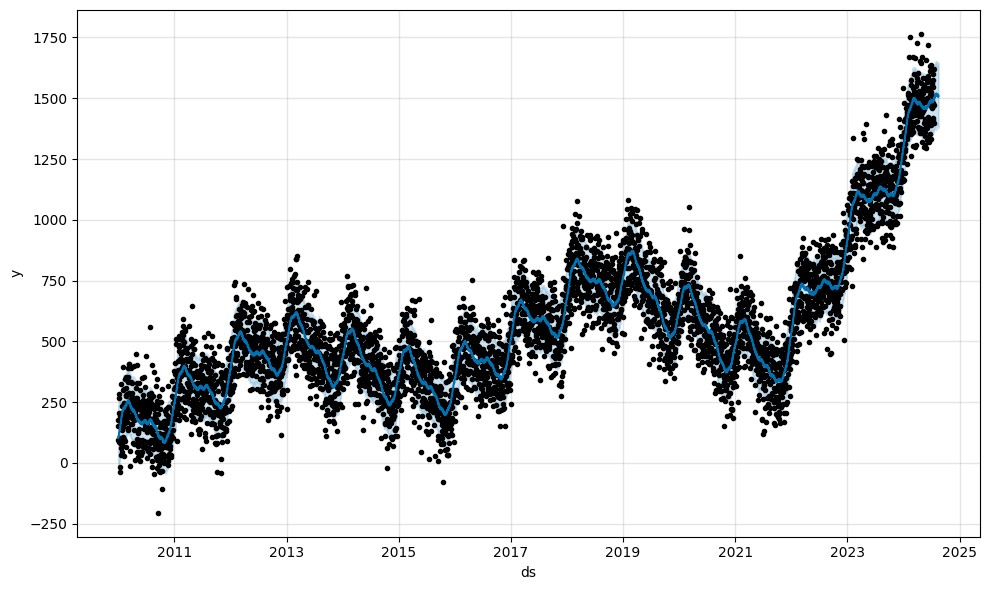

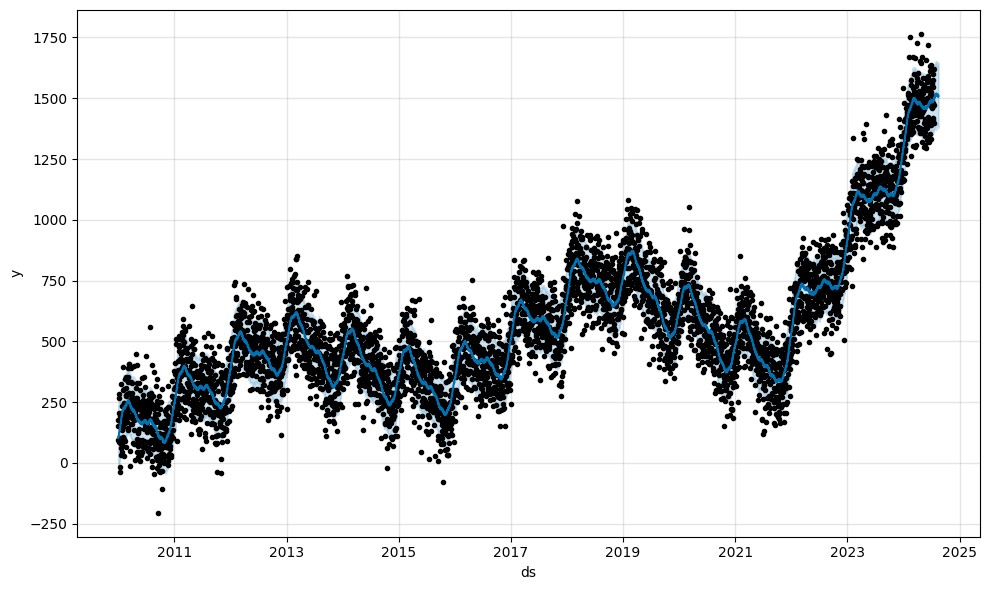

In [9]:
model.plot(forecast)


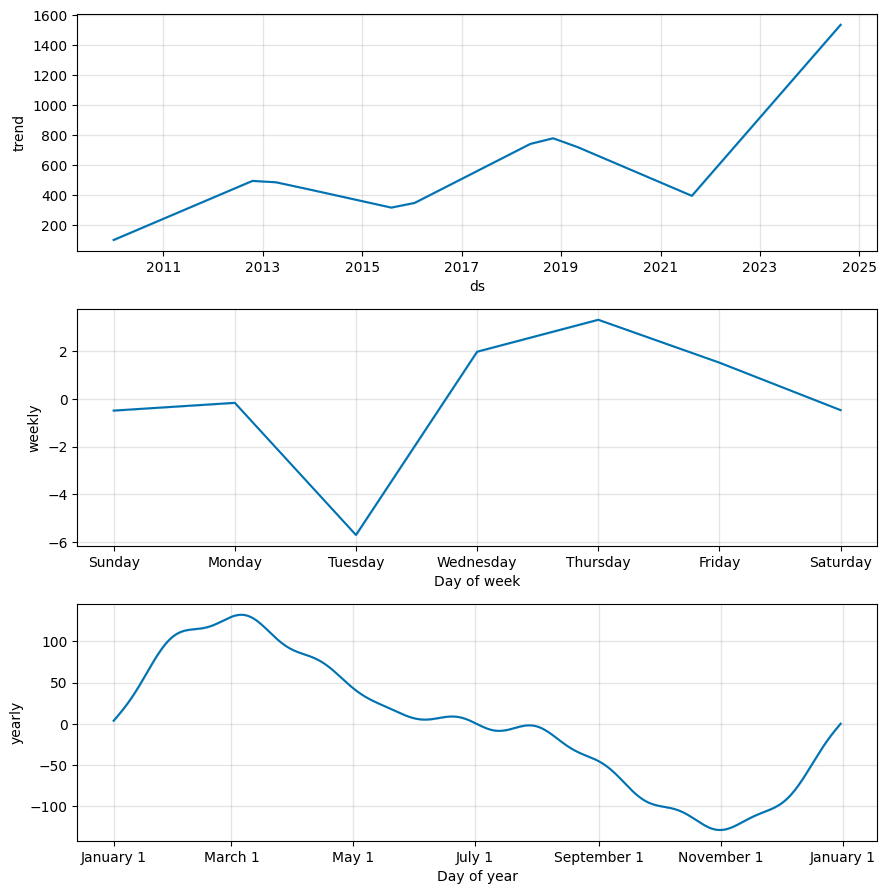

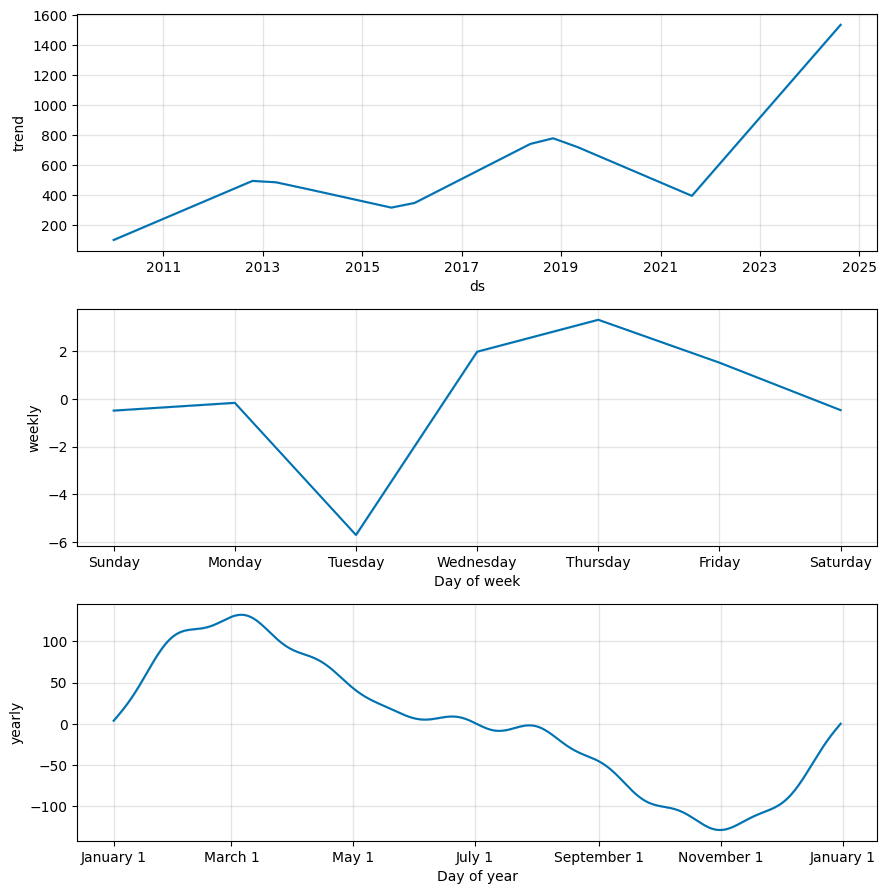

In [10]:
model.plot_components(forecast)


In [11]:
# Base model
model_base = Prophet(interval_width=0.90)  # Base scenario
model_base.fit(df)

# Best-case scenario
model_best = Prophet(interval_width=0.80)  # Lower interval
model_best.fit(df)

# Worst-case scenario
model_worst = Prophet(interval_width=0.95)  # Higher interval
model_worst.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/w3wp0wnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/ulwk_nu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21025', 'data', 'file=/tmp/tmp1tnpgqtf/w3wp0wnp.json', 'init=/tmp/tmp1tnpgqtf/ulwk_nu5.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelopd98_vw/prophet_model-20241030070322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1t

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/fejg705z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/p7mj5wgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22615', 'data', 'file=/tmp/tmp1tnpgqtf/fejg705z.json', 'init=/tmp/tmp1tnpgqtf/p7mj5wgg.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelfu2i58ap/prophet_model-20241030070450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1t

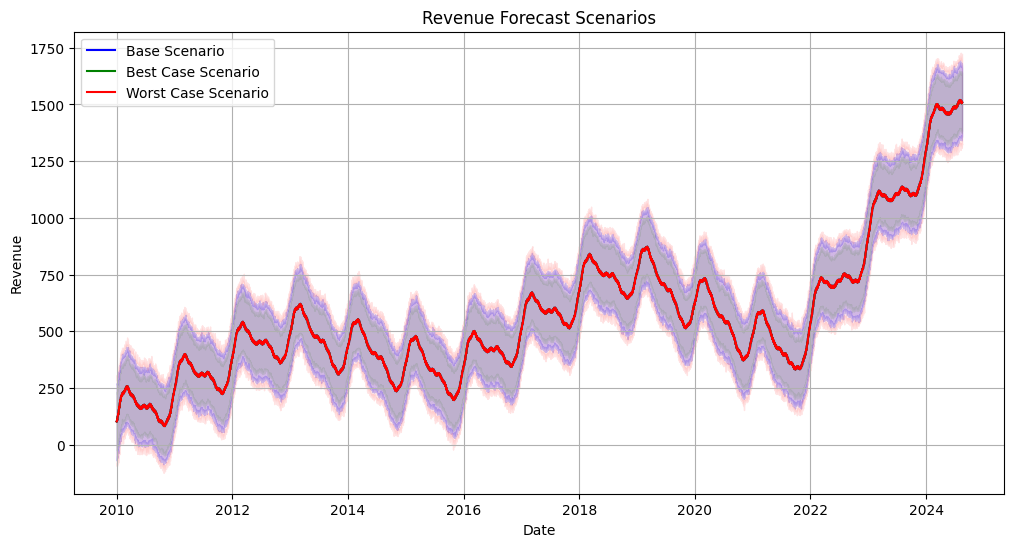

In [13]:
# Install required packages
!pip install prophet
!pip install openpyxl
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("/content/Forecast Data.xlsx")

# Prepare data for Prophet
df = data[['Date', 'Revenue']].rename(columns={'Date': 'ds', 'Revenue': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Base scenario
model_base = Prophet(interval_width=0.90)
model_base.fit(df)
future_base = model_base.make_future_dataframe(periods=30)
forecast_base = model_base.predict(future_base)

# Best-case scenario
model_best = Prophet(interval_width=0.80)
model_best.fit(df)
forecast_best = model_best.predict(future_base)  # Use same future dates for consistency

# Worst-case scenario
model_worst = Prophet(interval_width=0.95)
model_worst.fit(df)
forecast_worst = model_worst.predict(future_base)

# Plot the results for all scenarios
plt.figure(figsize=(12, 6))

# Plot Base scenario
plt.plot(forecast_base['ds'], forecast_base['yhat'], label='Base Scenario', color='blue')
plt.fill_between(forecast_base['ds'], forecast_base['yhat_lower'], forecast_base['yhat_upper'], color='blue', alpha=0.2)

# Plot Best-case scenario
plt.plot(forecast_best['ds'], forecast_best['yhat'], label='Best Case Scenario', color='green')
plt.fill_between(forecast_best['ds'], forecast_best['yhat_lower'], forecast_best['yhat_upper'], color='green', alpha=0.1)

# Plot Worst-case scenario
plt.plot(forecast_worst['ds'], forecast_worst['yhat'], label='Worst Case Scenario', color='red')
plt.fill_between(forecast_worst['ds'], forecast_worst['yhat_lower'], forecast_worst['yhat_upper'], color='red', alpha=0.1)

# Customizing the plot
plt.title("Revenue Forecast Scenarios")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Example of automating a Prophet forecast in Python
import pandas as pd
from prophet import Prophet

def run_forecast():
    df = pd.read_csv('latest_data.csv')
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    forecast.to_csv('forecast_output.csv')  # Save the output for reporting

if __name__ == "__main__":
    run_forecast()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/cv346w8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/xecpi5nz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36116', 'data', 'file=/tmp/tmp1tnpgqtf/cv346w8s.json', 'init=/tmp/tmp1tnpgqtf/xecpi5nz.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelufriw2wf/prophet_model-20241030070747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


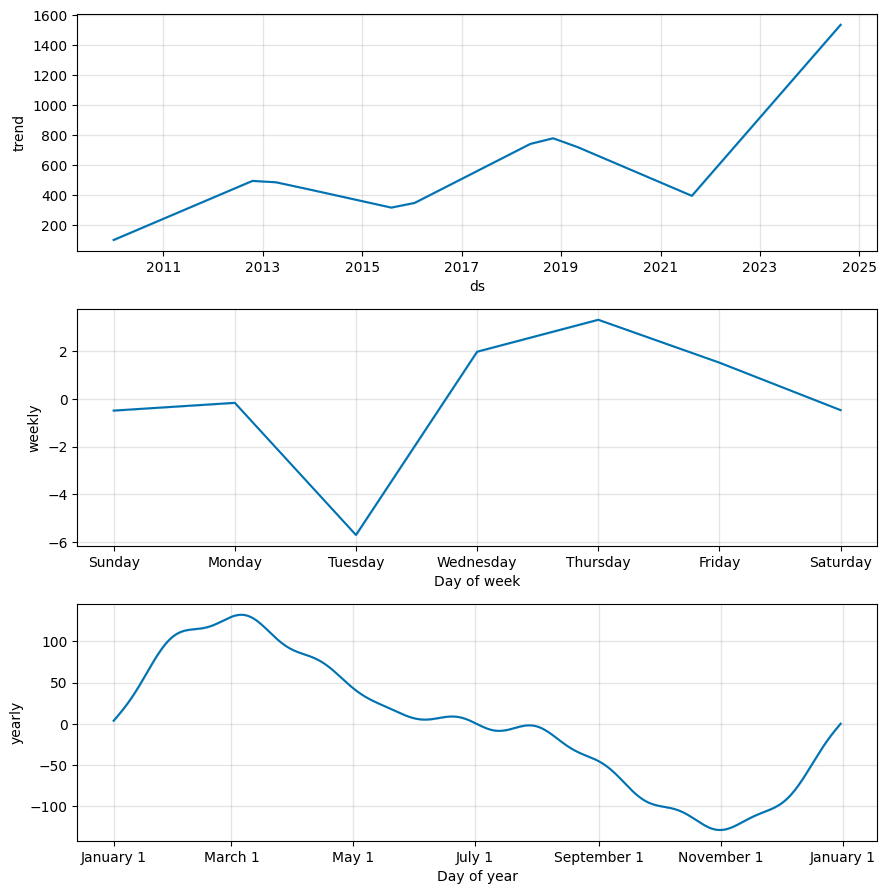

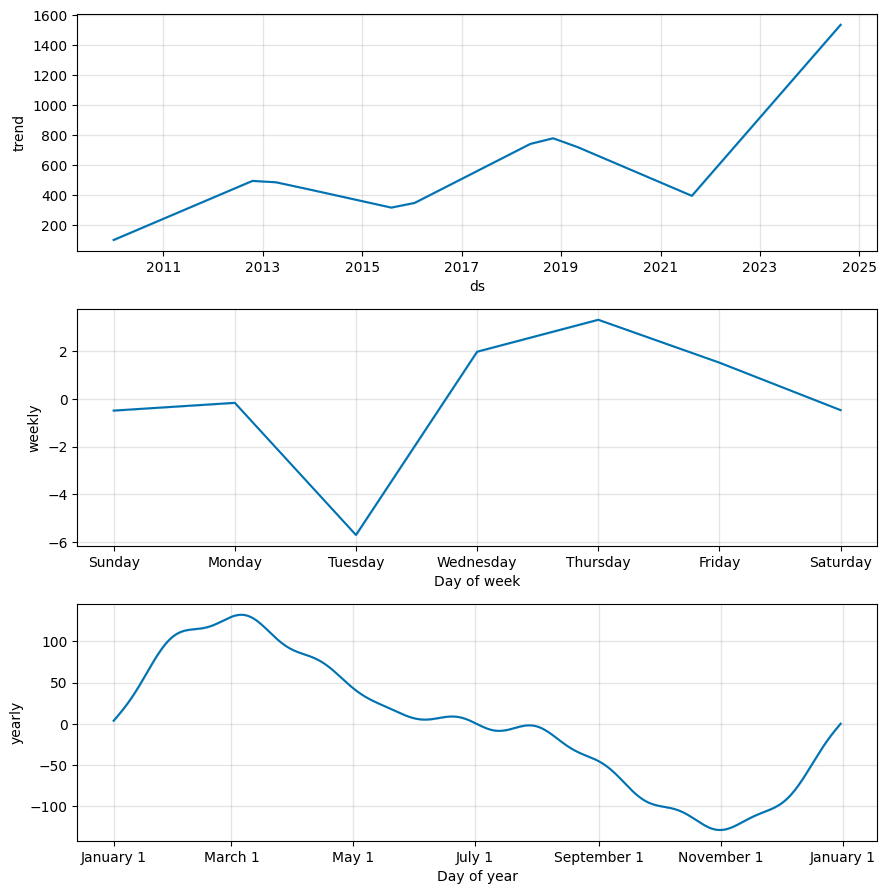

In [14]:
# Install necessary libraries
!pip install prophet
!pip install openpyxl
import pandas as pd
from prophet import Prophet

# Load the data
data = pd.read_excel("/content/Forecast Data.xlsx")

# Prepare the data for Prophet
df = data[['Date', 'Revenue']].rename(columns={'Date': 'ds', 'Revenue': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the components to view trend, weekly, and yearly seasonality
model.plot_components(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/pz52by72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tnpgqtf/4w1lvjuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24290', 'data', 'file=/tmp/tmp1tnpgqtf/pz52by72.json', 'init=/tmp/tmp1tnpgqtf/4w1lvjuh.json', 'output', 'file=/tmp/tmp1tnpgqtf/prophet_modelof63xb9m/prophet_model-20241030070808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1t

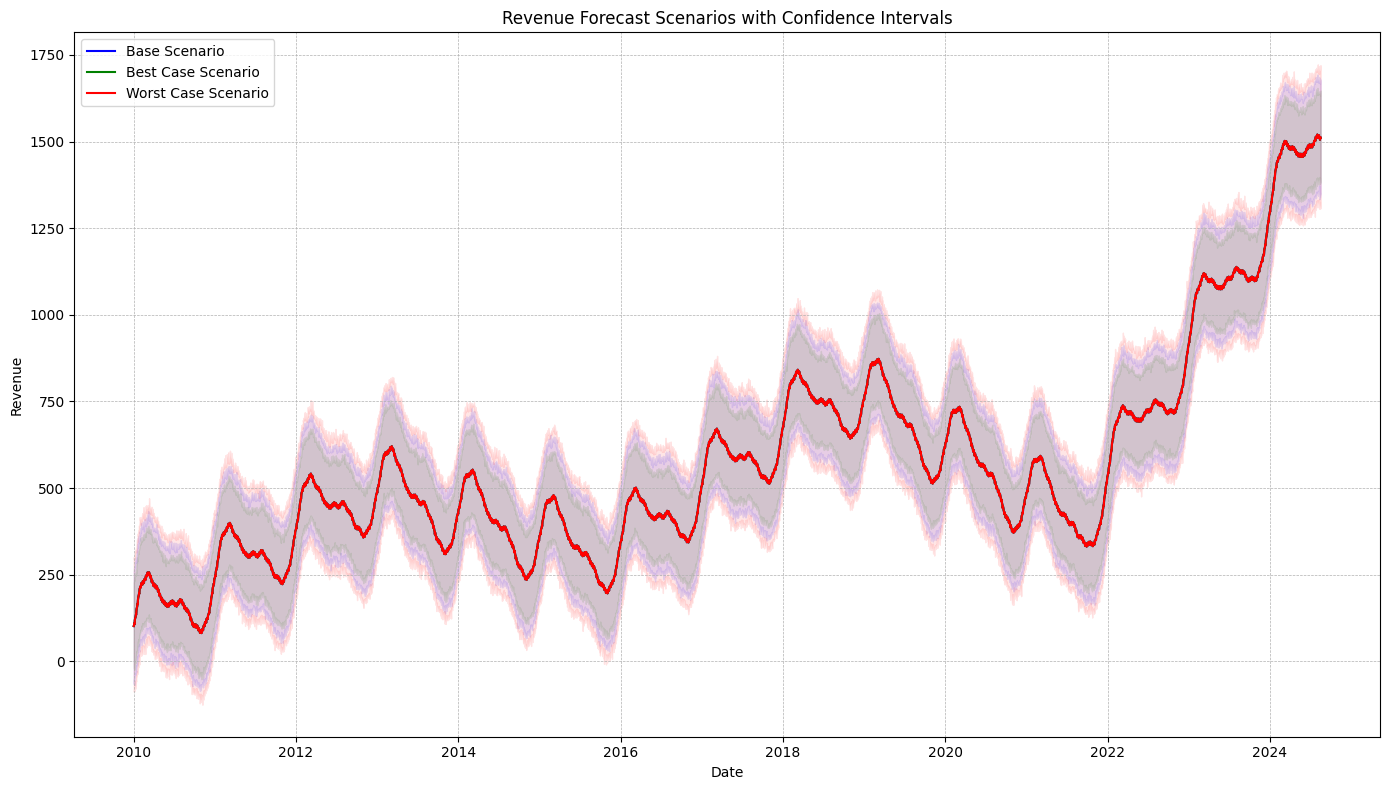

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Fit base, best-case, and worst-case models
model_base = Prophet(interval_width=0.90)
model_base.fit(df)
forecast_base = model_base.predict(future)

model_best = Prophet(interval_width=0.80)
model_best.fit(df)
forecast_best = model_best.predict(future)

model_worst = Prophet(interval_width=0.95)
model_worst.fit(df)
forecast_worst = model_worst.predict(future)

# Plot the forecasts with confidence intervals for each scenario
plt.figure(figsize=(14, 8))

# Base Scenario
sns.lineplot(x=forecast_base['ds'], y=forecast_base['yhat'], label='Base Scenario', color='blue')
plt.fill_between(forecast_base['ds'], forecast_base['yhat_lower'], forecast_base['yhat_upper'], color='blue', alpha=0.1)

# Best-case Scenario
sns.lineplot(x=forecast_best['ds'], y=forecast_best['yhat'], label='Best Case Scenario', color='green')
plt.fill_between(forecast_best['ds'], forecast_best['yhat_lower'], forecast_best['yhat_upper'], color='green', alpha=0.1)

# Worst-case Scenario
sns.lineplot(x=forecast_worst['ds'], y=forecast_worst['yhat'], label='Worst Case Scenario', color='red')
plt.fill_between(forecast_worst['ds'], forecast_worst['yhat_lower'], forecast_worst['yhat_upper'], color='red', alpha=0.1)

# Customize the plot
plt.title("Revenue Forecast Scenarios with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


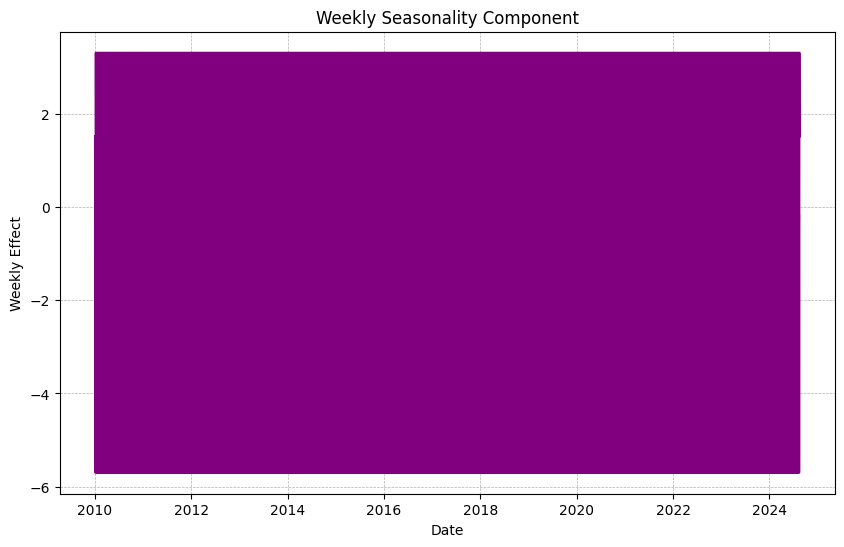

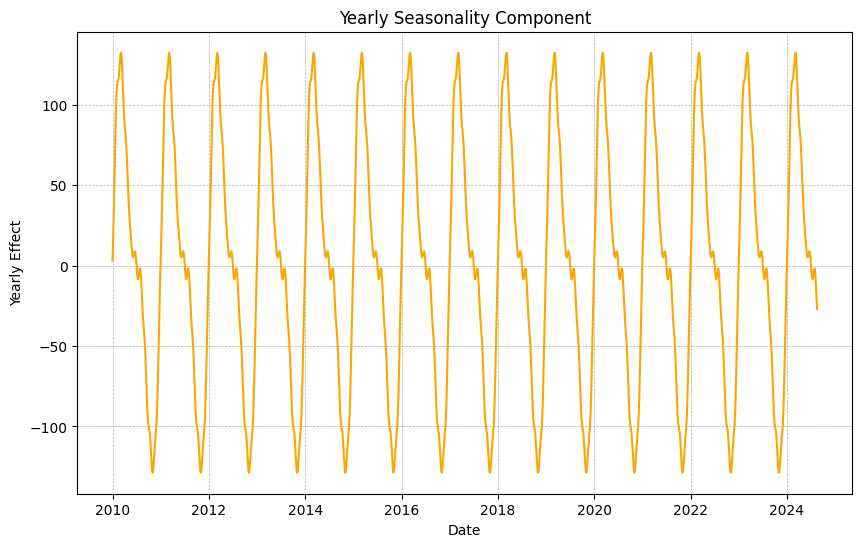

In [16]:
# Extract the weekly and yearly seasonal components
weekly = forecast[['ds', 'weekly']]
yearly = forecast[['ds', 'yearly']]

# Plot the Weekly Seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(x='ds', y='weekly', data=weekly, color='purple')
plt.title("Weekly Seasonality Component")
plt.xlabel("Date")
plt.ylabel("Weekly Effect")
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()

# Plot the Yearly Seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(x='ds', y='yearly', data=yearly, color='orange')
plt.title("Yearly Seasonality Component")
plt.xlabel("Date")
plt.ylabel("Yearly Effect")
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()


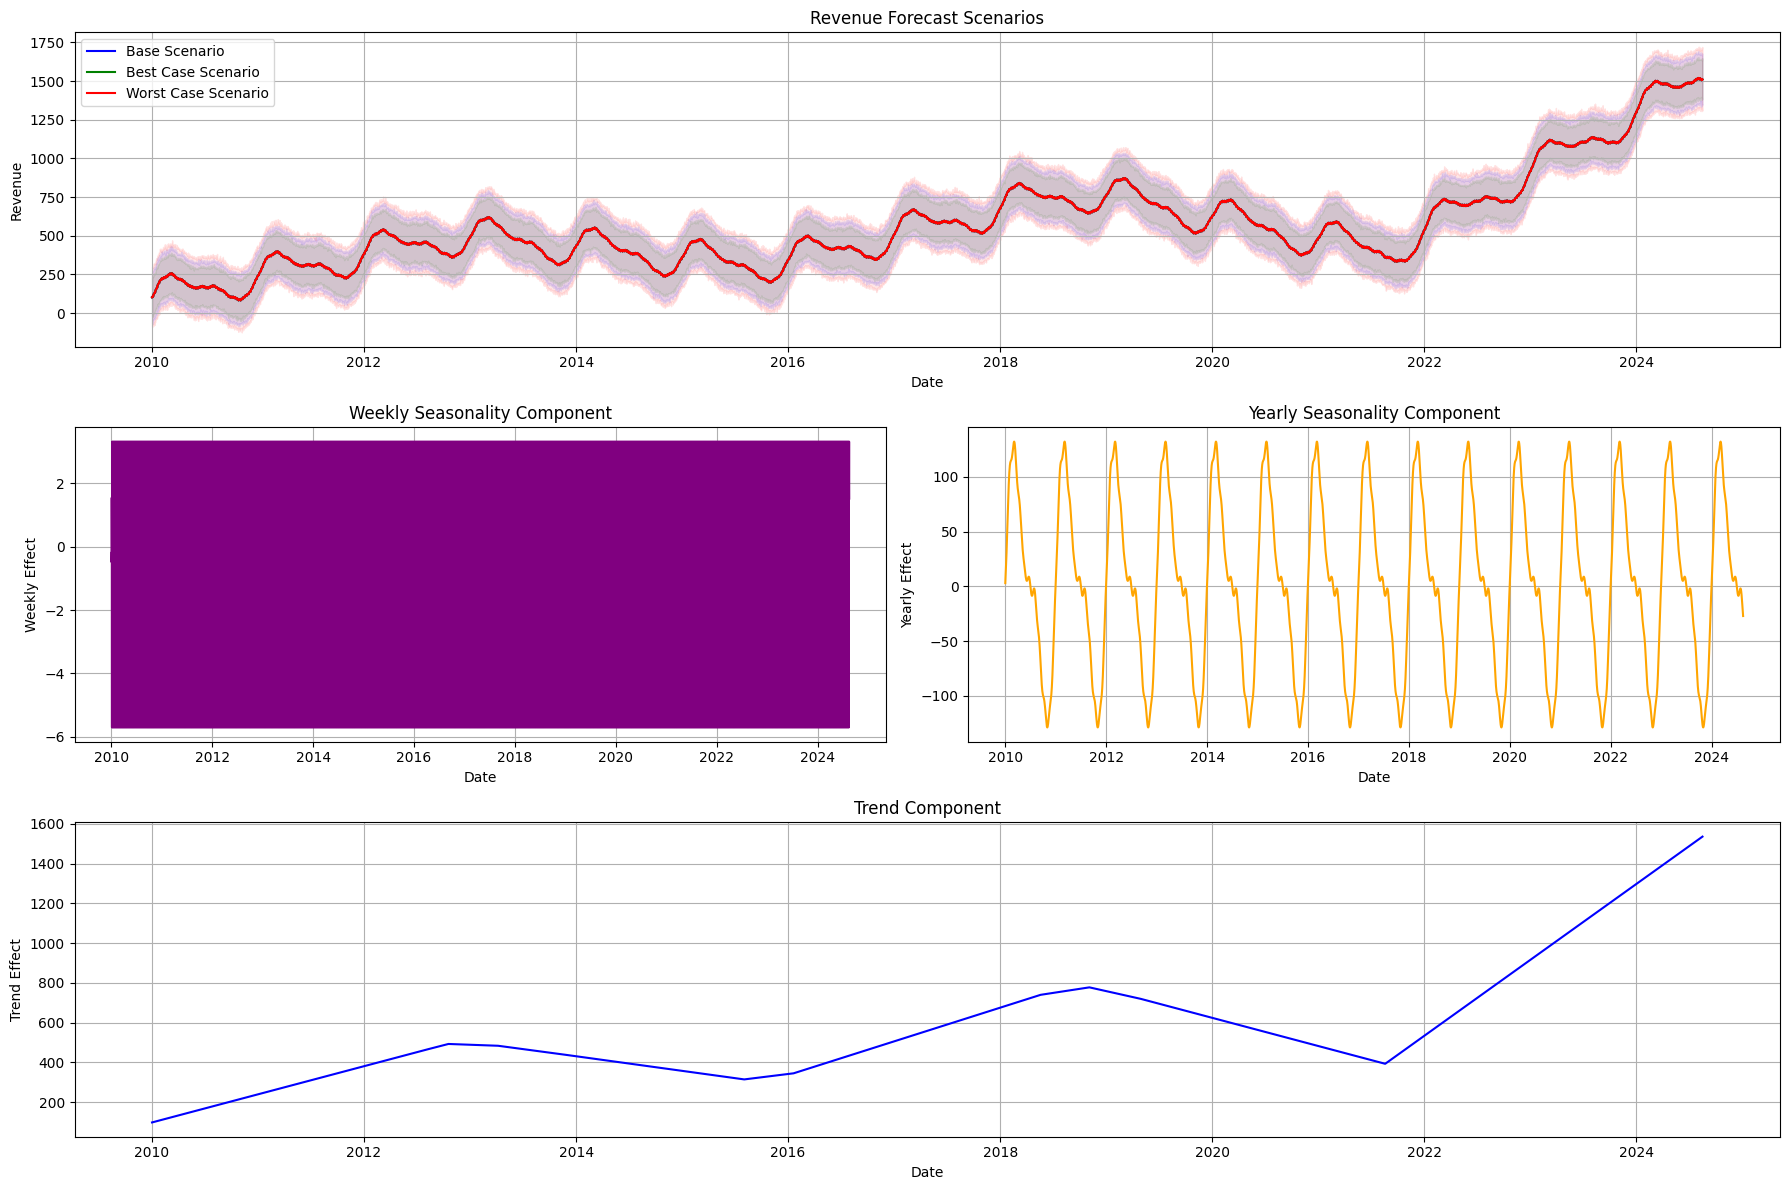

In [17]:
from matplotlib.gridspec import GridSpec

# Create a dashboard layout with GridSpec
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=fig)

# Main forecast with scenarios
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(forecast_base['ds'], forecast_base['yhat'], label='Base Scenario', color='blue')
ax1.fill_between(forecast_base['ds'], forecast_base['yhat_lower'], forecast_base['yhat_upper'], color='blue', alpha=0.1)
ax1.plot(forecast_best['ds'], forecast_best['yhat'], label='Best Case Scenario', color='green')
ax1.fill_between(forecast_best['ds'], forecast_best['yhat_lower'], forecast_best['yhat_upper'], color='green', alpha=0.1)
ax1.plot(forecast_worst['ds'], forecast_worst['yhat'], label='Worst Case Scenario', color='red')
ax1.fill_between(forecast_worst['ds'], forecast_worst['yhat_lower'], forecast_worst['yhat_upper'], color='red', alpha=0.1)
ax1.set_title("Revenue Forecast Scenarios")
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue")
ax1.legend()
ax1.grid(True)

# Weekly seasonality component
ax2 = fig.add_subplot(gs[1, 0])
sns.lineplot(x='ds', y='weekly', data=weekly, color='purple', ax=ax2)
ax2.set_title("Weekly Seasonality Component")
ax2.set_xlabel("Date")
ax2.set_ylabel("Weekly Effect")
ax2.grid(True)

# Yearly seasonality component
ax3 = fig.add_subplot(gs[1, 1])
sns.lineplot(x='ds', y='yearly', data=yearly, color='orange', ax=ax3)
ax3.set_title("Yearly Seasonality Component")
ax3.set_xlabel("Date")
ax3.set_ylabel("Yearly Effect")
ax3.grid(True)

# Trend component from Prophet
ax4 = fig.add_subplot(gs[2, :])
ax4.plot(forecast_base['ds'], forecast_base['trend'], color='blue', label='Trend')
ax4.set_title("Trend Component")
ax4.set_xlabel("Date")
ax4.set_ylabel("Trend Effect")
ax4.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()
